## KITTI 数据集格式 —— 物体检测与定位

#Values  |  Name  |    Description
--- |--- | --- 
1  |  type       |  Describes the type of object: 'Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', Cyclist', 'Tram', 'Misc' or 'DontCare'
1  |  truncated  |  Float from 0 (non-truncated) to 1 (truncated), where truncated refers to the object leaving image boundaries
1  |  occluded   |  Integer (0,1,2,3) indicating occlusion state: 0 = fully visible, 1 = partly occluded 2 = largely occluded, 3 = unknown
1  |  alpha      |  Observation angle of object, ranging [-pi..pi]
4  |  bbox       |  2D bounding box of object in the image (0-based index): contains left, top, right, bottom pixel coordinates
3  |  dimensions | 3D object dimensions: height, width, length (in meters)
3  |  location   |  3D object location x,y,z in camera coordinates (in meters)
1  |  rotation_y | Rotation ry around Y-axis in camera coordinates [-pi..pi]
1  |  score      |  Only for results: Float, indicating confidence in detection, needed for p/r curves, higher is better.

**NOTE**: The difference between **rotation_y** and **alpha** is, that rotation_y is directly given in **camera coordinates**, while alpha also considers the **vector from the camera center to the object center**, to compute the relative orientation of the object with respect to the camera. For example, a car which is facing along the X-axis of the camera coordinate system corresponds to rotation_y=0, no matter where it is located in the X/Z plane (bird's eye view), while alpha is zero only, when this object is located along the Z-axis of the
camera. When moving the car away from the Z-axis, the observation angle will change.

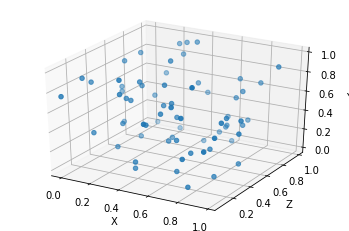

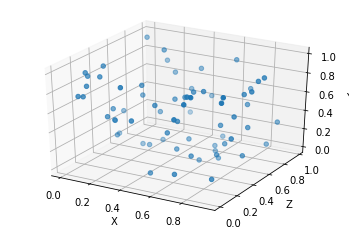

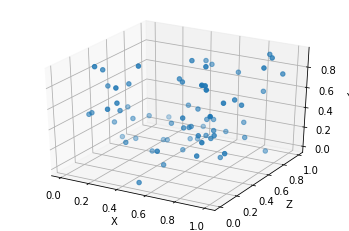

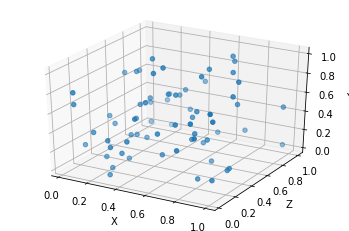

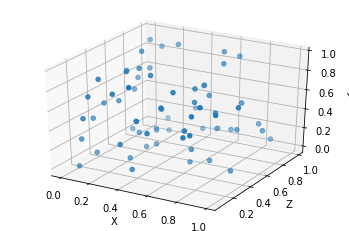

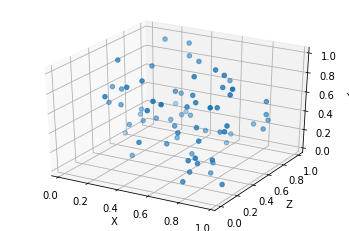

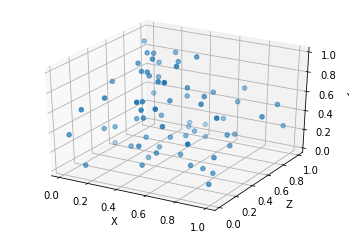

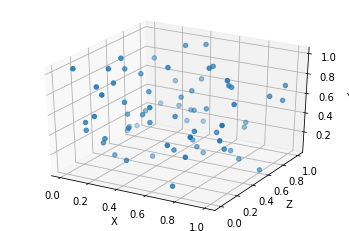

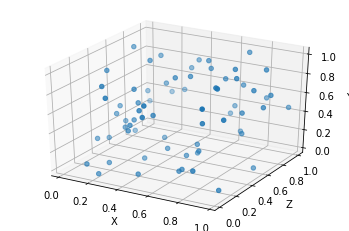

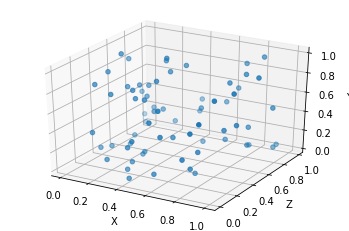

In [2]:
import matplotlib.pyplot as plt

import numpy as np

i = 0
while i < 10:
    i += 1
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')

    # xs, ys, zs = [1,2,3,4], 2*np.array([1,2,3,4]), 3*np.array([1,2,3,4])
    xs = np.random.random((70,))
    ys = np.random.random((70,))
    zs = np.random.random((70,))
#     print('ys:', ys)
#     print('zs:', zs)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    ax.scatter(xs=xs, ys=ys, zs=zs, zdir='y')

In [16]:
i = 0
while i<1:
    xs = np.random.random((10,))
    ys = np.random.random((10,))
    zs = np.random.random((10,))
    ax.scatter(xs=xs, ys=ys, zs=zs, zdir='y')
    i += 1

In [8]:
#!pip list

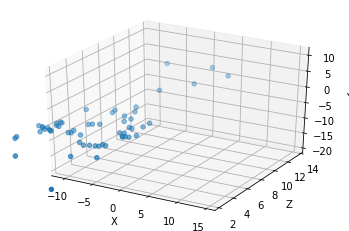

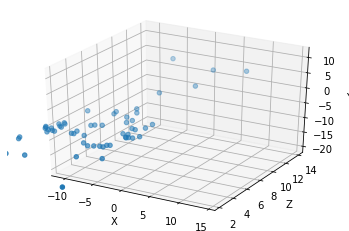

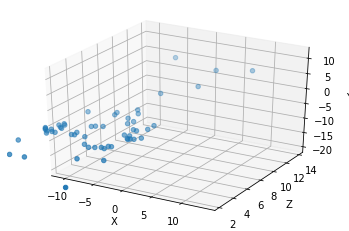

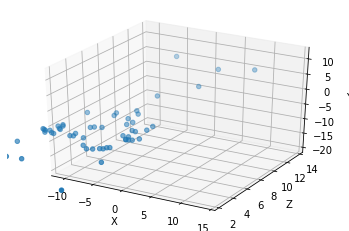

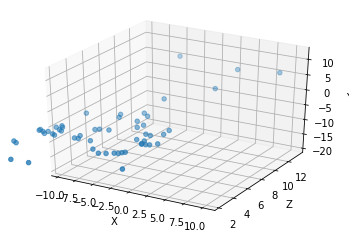

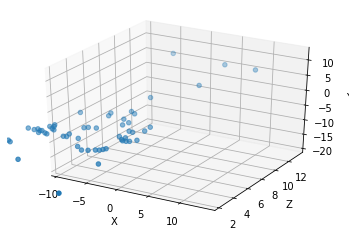

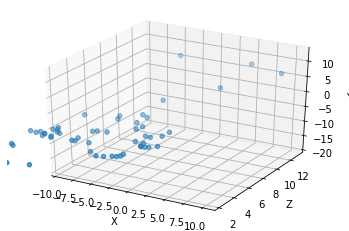

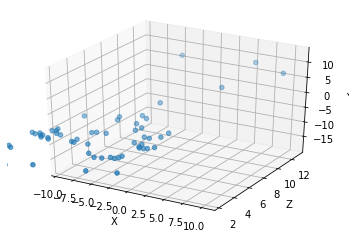

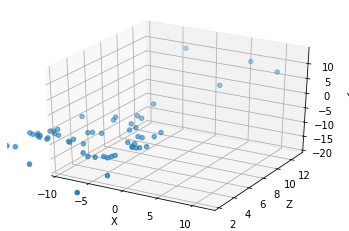

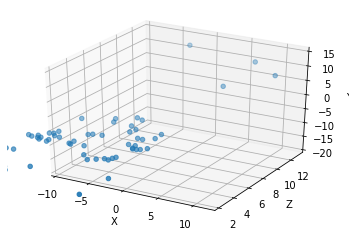

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import json


i = 1
with open('../output/results.json') as fin:
    data = json.load(fin)
    for frame in data.keys():
#         print('frame:', frame)
        xs, ys, zs = [], [], []
        
        for person in data[frame].keys():
            xs.append(data[frame][person][0])
            ys.append(data[frame][person][1])
            zs.append(data[frame][person][2])
        
        xs = np.array(xs)
        ys = np.array(ys)
        zs = np.array(zs)
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.set_xlabel('X')
        ax.set_ylabel('Z')
        ax.set_zlabel('Y')

        ax.scatter(xs=xs, ys=zs, zs=ys, zdir='y')
        
        i += 1
        if i > 10:
            break

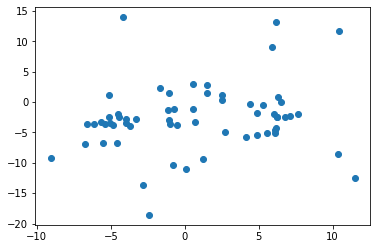

In [21]:
plt.scatter(xs, ys)

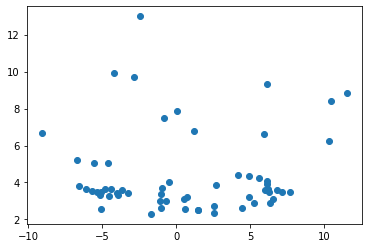

In [22]:
plt.scatter(xs, zs)

## 行人轨迹

results.json 格式：
{
    frame_id: {
        person_id: {
            x:...,
            y:...,
            z:...
        }
    }
}

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [94]:
# i = 0
person = {
    '1':{
        'x':[],
        'y':[],
        'z':[]
    },
    '2':{
        'x':[],
        'y':[],
        'z':[]
    },
    '3':{
        'x':[],
        'y':[],
        'z':[]
    }
}
with open('../output/results.json') as fin:
    data = json.load(fin)
    for fid in data.keys():
        for pid in data[fid].keys():            
            person[pid]['x'].append(data[fid][pid][0])
            person[pid]['y'].append(data[fid][pid][1])
            person[pid]['z'].append(data[fid][pid][2])
            
# person['gt'] = {
#     'x': [-3, 3, 3, -3, -3],
#     'y': [1.3, 1.3, 1.3, 1.3, 1.3],
#     'z': [6, 6, 11, 11, 6]
# }

In [95]:
# print(len(person['1']['x']),\
# len(person['1']['y']),\
# len(person['1']['z']))

In [96]:
# print(len(person['2']['x']),\
# len(person['2']['y']),\
# len(person['2']['z']))

In [97]:
# print(len(person['3']['x']),\
# len(person['3']['y']),\
# len(person['3']['z']))

**以上结果，很奇怪这三个行人位置点数不相等，而且不等于总图片帧数**

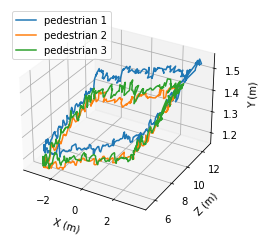

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X (m)')
ax.set_ylabel('Z (m)')
ax.set_zlabel('Y (m)')

for pid in person.keys():
    xs = np.array(person[pid]['x'])
    ys = np.array(person[pid]['y'])
    zs = np.array(person[pid]['z'])
    if pid != 'gt':
        label='pedestrian ' + pid
    else:
        label = 'ground truth'
    ax.plot(xs=xs, ys=ys, zs=zs, zdir='y', label=label)
    ax.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


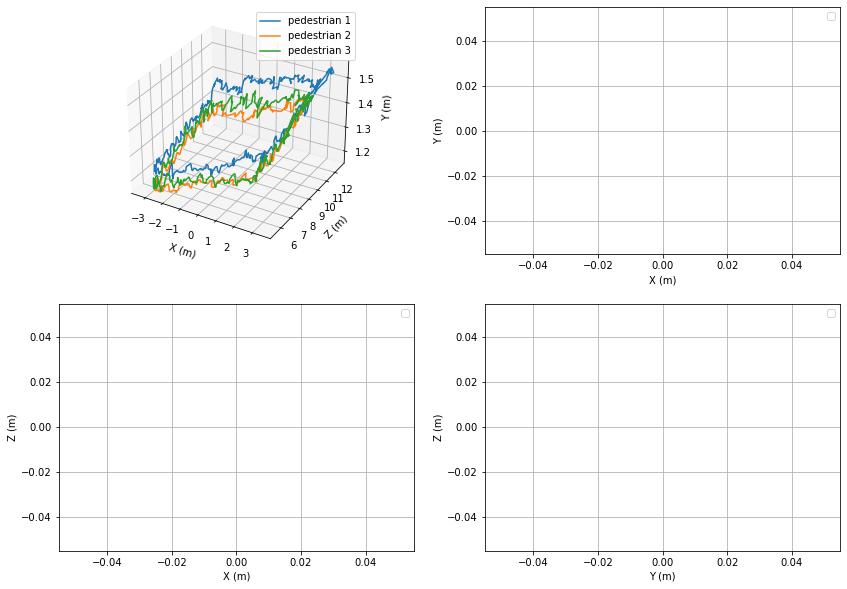

In [106]:
"""
Demonstrate the mixing of 2d and 3d subplots
"""
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


################
# First subplot
################
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.set_xlabel('X (m)')
ax.set_ylabel('Z (m)')
ax.set_zlabel('Y (m)')

for pid in person.keys():
    xs = np.array(person[pid]['x'])
    ys = np.array(person[pid]['y'])
    zs = np.array(person[pid]['z'])
    if pid != 'gt':
        label = 'pedestrian ' + pid
    else:
        label = 'ground truth'
    ax.plot(xs=xs, ys=ys, zs=zs, zdir='y', label=label)
    ax.legend()
ax.grid(True)

#################
# Second subplot
#################
ax = fig.add_subplot(2, 2, 2)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')

for pid in person.keys():
    xs = np.array(person[pid]['x'])
    ys = np.array(person[pid]['y'])
    if pid != 'gt':
        label='pedestrian ' + pid
    else:
        label = 'ground truth'
        print(label)
    ax.plot(xs=xs, ys=ys, label=label)
    ax.legend()
ax.grid(True)

#################
# Third subplot
#################
ax = fig.add_subplot(2, 2, 3)
ax.set_xlabel('X (m)')
ax.set_ylabel('Z (m)')

for pid in person.keys():
    xs = np.array(person[pid]['x'])
    zs = np.array(person[pid]['z'])
    if pid != 'gt':
        label='pedestrian ' + pid
    else:
        label = 'ground truth'
    ax.plot(xs=xs, ys=zs, label=label)
    ax.legend()
ax.grid(True)

#################
# Fourth subplot
#################
ax = fig.add_subplot(2, 2, 4)
ax.set_xlabel('Y (m)')
ax.set_ylabel('Z (m)')
for pid in person.keys():
    ys = np.array(person[pid]['y'])
    zs = np.array(person[pid]['z'])
    if pid != 'gt':
        label='pedestrian ' + pid
    else:
        label = 'ground truth'
    ax.plot(xs=ys, ys=zs, label=label)
    ax.legend()
ax.grid(True)
    
plt.show()

### 对原始轨迹用移动平均做平滑

In [81]:
moving_average_person = {
    '1':{
        'x': [],
        'y': [],
        'z': []
    },
    '2':{
        'x': [],
        'y': [],
        'z': []
    },
    '3':{
        'x': [],
        'y': [],
        'z': []
    }
}

for pid in person.keys():
    num = len(person[pid]['x'])
    for i in range(num - 20 + 1):
        sum_x, sum_y, sum_z = 0, 0, 0
        for j in range(i, i + 20):
            sum_x += person[pid]['x'][j]
            sum_y += person[pid]['y'][j]
            sum_z += person[pid]['z'][j]
        moving_average_person[pid]['x'].append(sum_x/20)
        moving_average_person[pid]['y'].append(sum_y/20)
        moving_average_person[pid]['z'].append(sum_z/20)
        
moving_average_person['gt'] = {
    'x': [-3, 3, 3, -3, -3],
    'y': [1.3, 1.3, 1.3, 1.3, 1.3],
    'z': [6, 6, 11, 11, 6]
}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


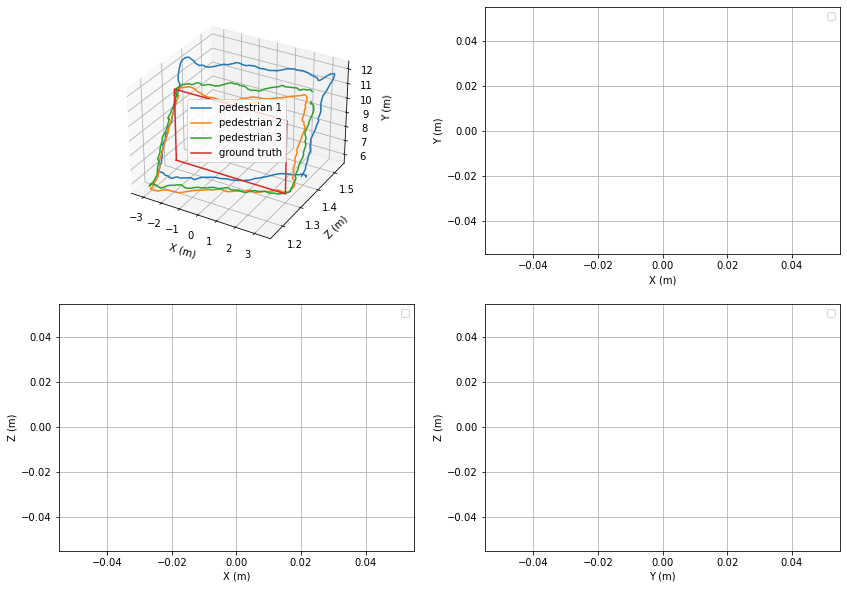

In [83]:
################
# First subplot
################
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.grid(True)

ax.set_xlabel('X (m)')
ax.set_ylabel('Z (m)')
ax.set_zlabel('Y (m)')

for pid in moving_average_person.keys():
    xs = np.array(moving_average_person[pid]['x'])
    ys = np.array(moving_average_person[pid]['y'])
    zs = np.array(moving_average_person[pid]['z'])
    if pid != 'gt':
        label='pedestrian ' + pid
    else:
        label = 'ground truth'
    ax.plot(xs=xs, ys=ys, zs=zs, zdir='y', label=label)
    ax.legend()
    
#################
# Second subplot
#################
ax = fig.add_subplot(2, 2, 2)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')

for pid in moving_average_person.keys():
    xs = np.array(moving_average_person[pid]['x'])
    ys = np.array(moving_average_person[pid]['y'])
    if pid != 'gt':
        label='pedestrian ' + pid
    else:
        label = 'ground truth'
    ax.plot(xs=xs, ys=ys, label=label)
    ax.legend()
ax.grid(True)

#################
# Third subplot
#################
ax = fig.add_subplot(2, 2, 3)
ax.set_xlabel('X (m)')
ax.set_ylabel('Z (m)')

for pid in moving_average_person.keys():
    xs = np.array(moving_average_person[pid]['x'])
    zs = np.array(moving_average_person[pid]['z'])
    if pid != 'gt':
        label='pedestrian ' + pid
    else:
        label = 'ground truth'
    ax.plot(xs=xs, ys=zs, label=label)
    ax.legend()
ax.grid(True)

#################
# Fourth subplot
#################
ax = fig.add_subplot(2, 2, 4)
ax.set_xlabel('Y (m)')
ax.set_ylabel('Z (m)')
for pid in moving_average_person.keys():
    ys = np.array(moving_average_person[pid]['y'])
    zs = np.array(moving_average_person[pid]['z'])
    if pid != 'gt':
        label='pedestrian ' + pid
    else:
        label = 'ground truth'
    ax.plot(xs=ys, ys=zs, label=label)
    ax.legend()
ax.grid(True)
    
plt.show()

**从上图中，可以看出**
    - x的取值范围是[-3m,3m]
    - z的取值范围是[6m,11m]

### 对原始轨迹用卡尔曼滤波做平滑

In [11]:
"""
因为行人走的是个矩形框，Kalman Filter中不好用一个运动模型描述，所以矩形每条边设一个运动模型

这样首先就要切分person[id]这个数据结构，把矩形切成四条边，关键是怎么切呢？

    1. 正规的矩形是知道的，按照两条对角线把矩形切成四块，每块对应的点就是一个集合
    2. pedestrian 1 对应的矩形框：(-2.7,12.5) (-2.7,6) (3,5.9) (3,11.7)
    3. pedestrian 2 对应的矩形框：(-3,11) (-3,5.5) (3,5.5) (3,11)
    4. pedestrian 3 对应的矩形框：(-3,11.4) (-3,5.8) (3,5.5) (3,11.3)
"""

def compute_slope_bias(p1, p2):
    slope = (p1[1] - p2[1])/(p1[0] - p2[0])
    bias = p1[1] - slope*p1[0]
    return slope, bias

top, left, bottom, right = [], [], [], []

p_lt,p_rb = (-2.7,12.5),(3,5.9)
p_lb,p_rt = (-2.7,6),(3,11.7)

slope_lt_rb, bias_lt_rb = compute_slope_bias(p_lt, p_rb)
slope_lb_rt, bias_lb_rt = compute_slope_bias(p_lb, p_rt)

## xz平面
num = len(person['1']['x'])
for i in range(num):
    true_z = person['1']['z'][i]
    
    computed_z1 = slope_lt_rb * person['1']['x'][i] + bias_lt_rb
    
    computed_z2 = slope_lb_rt * person['1']['x'][i] + bias_lb_rt
    
    if true_z > computed_z1 and true_z > computed_z2:
        top.append((person['1']['x'][i], person['1']['z'][i]))
    
    elif true_z > computed_z1 and true_z < computed_z2:
        right.append((person['1']['x'][i], person['1']['z'][i]))
        
    elif true_z < computed_z1 and true_z > computed_z2:
        left.append((person['1']['x'][i], person['1']['z'][i]))
        
    elif true_z < computed_z1 and true_z < computed_z2:
        bottom.append((person['1']['x'][i], person['1']['z'][i]))


In [14]:
print(len(top) + len(left) + len(bottom) + len(right))
# print(top)

682


In [ ]:
"""
对于每个人，设置一个状态转移方程和观测方程

pedestrian 1:
    状态转移方程 —— loc[t] = loc[t-1] + v[t-1] * delta_t + p[t]；
        p[t]是噪声项
        v[t-1] 是行走速度，恒为 1.35 m/s
    观测方程 —— z[t] = H[t] * loc[t] + q[t]；
        q[t]是噪声项
        H[t]是观测系数
        
    应用Kalman Filter，分为两步：
        step 1 —— 预测
            
        step 2 —— 校正
"""



In [ ]:
num = len(top)
for i in range(num):
    # 从右上角出发，走向左上角
    # step 1 —— 预测
    

### 一些测试

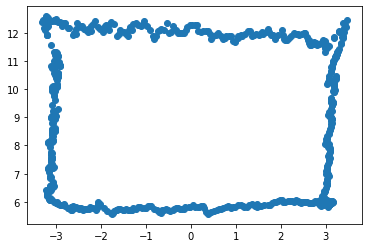

In [17]:
# 李骐宇
xs_1 = np.array(person['1']['x'])
zs_1 = np.array(person['1']['z'])

plt.scatter(xs_1, zs_1)

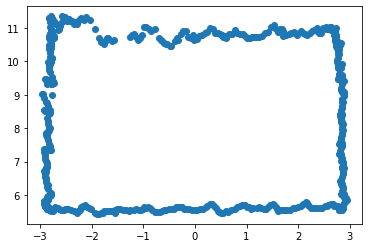

In [18]:
# 唐鑫桂
xs_2 = np.array(person['2']['x'])
zs_2 = np.array(person['2']['z'])

plt.scatter(xs_2, zs_2)

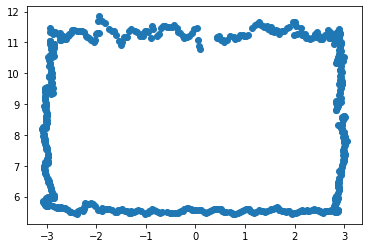

In [19]:
# 李婉婷
xs_3 = np.array(person['3']['x'])
zs_3 = np.array(person['3']['z'])

plt.scatter(xs_3, zs_3)

## 验证KITTI calib txt 文件

In [100]:
P2 = [
    [7.070493000000e+02, 0.000000000000e+00, 6.040814000000e+02, 4.575831000000e+01],
    [0.000000000000e+00, 7.070493000000e+02, 1.805066000000e+02, -3.454157000000e-01],
    [0.000000000000e+00, 0.000000000000e+00, 1.000000000000e+00, 4.981016000000e-03]
]
# P2 = [
#     [7.070493000000e+02, 0.000000000000e+00, 6.040814000000e+02],
#     [0.000000000000e+00, 7.070493000000e+02, 1.805066000000e+02],
#     [0.000000000000e+00, 0.000000000000e+00, 1.000000000000e+00]
# ]

# 我似乎明白了 R0_rect 的含义：从当前的相机坐标系 camera_2，旋转到 camera_0 坐标系的旋转变换
R0_rect = [
    [9.999128000000e-01, 1.009263000000e-02, -8.511932000000e-03, 0],
    [-1.012729000000e-02, 9.999406000000e-01, -4.037671000000e-03, 0],
    [8.470675000000e-03, 4.123522000000e-03, 9.999556000000e-01, 0],
    [0, 0, 0, 1]
]
# R0_rect = [
#     [9.999128000000e-01, 1.009263000000e-02, -8.511932000000e-03],
#     [-1.012729000000e-02, 9.999406000000e-01, -4.037671000000e-03],
#     [8.470675000000e-03, 4.123522000000e-03, 9.999556000000e-01]
# ]

# 标签文件中 汽车中心点：相机坐标
pos_Camera_2_Coordinate = [1.84, 1.47, 8.41, 1]
# pos_Camera_2_Coordinate = [1.84, 1.47, 8.41]

# 标签文件中汽车在图片的： bbox
left_top_right_bottom = [712.40, 143.00, 810.73, 307.92]

# 汽车在图片的中心点
expected_result = [(left_top_right_bottom[0] + left_top_right_bottom[2])/2, (left_top_right_bottom[1] + left_top_right_bottom[3])/2]

In [101]:
import numpy as np

P2 = np.array(P2)
R0_rect = np.array(R0_rect)
pos_Camera_2_Coordinate = np.array(pos_Camera_2_Coordinate)

In [102]:
print('P2:', P2)
print('R0_rect:', R0_rect)
print('pos_Camera_2_Coordinate:', pos_Camera_2_Coordinate)

P2: [[ 7.070493e+02  0.000000e+00  6.040814e+02  4.575831e+01]
 [ 0.000000e+00  7.070493e+02  1.805066e+02 -3.454157e-01]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  4.981016e-03]]
R0_rect: [[ 0.9999128   0.01009263 -0.00851193  0.        ]
 [-0.01012729  0.9999406  -0.00403767  0.        ]
 [ 0.00847068  0.00412352  0.9999556   0.        ]
 [ 0.          0.          0.          1.        ]]
pos_Camera_2_Coordinate: [1.84 1.47 8.41 1.  ]


In [105]:
"""
现在明确了，把 i号相机坐标系中的点 —— pos_Camera_2_Coordinate，转换到归一化像平面的计算方法就是下面这样

算出来的这个坐标，在像平面的bbox内，但距离中心点的距离还很远，计算不准

但是根据给定的数据，真实结果就是这样
"""

aaa = np.matmul(P2, pos_Camera_2_Coordinate)
bbb = aaa/8.41498102
print('归一化像平面坐标：', bbb)


归一化像平面坐标： [763.76329082 303.87205333   1.        ]


In [106]:
"""
现在明确了，把 0号相机坐标系中的点 —— pos_Camera_2_Coordinate，转换到归一化像平面的计算方法就是下面这样

算出来的这个坐标，在像平面的bbox内，但距离中心点的距离还很远
"""

r1 = np.matmul(P2, R0_rect)
# print('r1:', r1)

# print('expected_result:', expected_result)

computed_result = np.matmul(r1, pos_Camera_2_Coordinate)
print('computed_result:', computed_result/8.43625523)

computed_result: [758.59097019 299.14594118   1.        ]


In [90]:
fx = 7.070493000000e+02
fy = 7.070493000000e+02
H = 1.89
xc = 761.565
xi = 1224/2
yc = 225.46
yi = 370/2
n = 370
h = 307.92 - 143.00

In [92]:
"""
为什么 y 值差距这么大？？？计算中心点的缘故？？？
"""

x_pedestrian = fy/fx * H * (xc-xi) / h
y_pedestrian = H * (yc-yi) / h
z_pedestrian = H * fy / h
print('computed position in camera coordinate:', float('{0:.2f}'.format(x_pedestrian)), float('{0:.2f}'.format(y_pedestrian)), float('{0:.2f}'.format(z_pedestrian)))
print('ground-truth position in camera coordinate:', pos_Camera_2_Coordinate[0], pos_Camera_2_Coordinate[1], pos_Camera_2_Coordinate[2])

computed position in camera coordinate: 1.71 0.46 8.1
ground-truth position in camera coordinate: 1.84 1.47 8.41


### 验证相机坐标系下的点 (x,y,z,1) 经过内参矩阵P2，投影到像平面，是否为bbox中心点
* 答案是否定的，离中心点还有明显的距离
* 实验表明，相机坐标系下的点经过内参矩阵投影到像平面，x坐标比较准，y坐标误差大
    - 这解释了我的定位方法计算出来相机坐标系下 y 值不准的问题

In [117]:
import numpy as np

In [108]:
"""
000000.png为例
"""

P2 = [
    [7.070493000000e+02, 0.000000000000e+00, 6.040814000000e+02, 4.575831000000e+01],
    [0.000000000000e+00, 7.070493000000e+02, 1.805066000000e+02, -3.454157000000e-01],
    [0.000000000000e+00, 0.000000000000e+00, 1.000000000000e+00, 4.981016000000e-03]
]
P2 = np.array(P2)
print('P2:', P2)

x = [1.84, 1.47, 8.41, 1]
x = np.array(x)
print('x:', x)


P2: [[ 7.070493e+02  0.000000e+00  6.040814e+02  4.575831e+01]
 [ 0.000000e+00  7.070493e+02  1.805066e+02 -3.454157e-01]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  4.981016e-03]]
x: [1.84 1.47 8.41 1.  ]


In [114]:
# 投影到像平面的点
r = np.matmul(P2, x)
print('r:', r)

r: [6427.053596   2557.0775613     8.41498102]


In [115]:
# 投影到像平面的点 转换成齐次坐标
r/r[2]

array([763.76329118, 303.87205348,   1.        ])

In [116]:
# 求bbox真实中点
bbox = [712.40, 143.00, 810.73, 307.92]
print('center of bbox:', (bbox[0]+bbox[2])/2, (bbox[1]+bbox[3])/2)

center of bbox: 761.565 225.46


In [120]:
"""
000015.png为例
"""


P2 = [
    [7.183351000000e+02, 0.000000000000e+00, 6.003891000000e+02, 4.450382000000e+01 ],
    [0.000000000000e+00, 7.183351000000e+02, 1.815122000000e+02, -5.951107000000e-01 ],
    [0.000000000000e+00, 0.000000000000e+00, 1.000000000000e+00, 2.616315000000e-03],
]
P2 = np.array(P2)


x1 = [4.75, 1.33, 7.59, 1]
x1 = np.array(x1)

x2 = [2.46, 1.41, 24.14, 1]
x2 = np.array(x2)

x3 = [3.30, 1.40, 24.22, 1]
x3 = np.array(x3)

x4 = [-1.79, 1.36, 23.30, 1]
x4 = np.array(x4)

In [121]:
r1 = np.matmul(P2, x1)
print('r1:', r1/r1[2])

bbox1 = [1021.76, 133.28, 1101.39, 316.63]
print('center of bbox:', (bbox1[0]+bbox1[2])/2, (bbox1[1]+bbox1[3])/2)

r1: [1.05543972e+03 3.07202165e+02 1.00000000e+00]
center of bbox: 1061.575 224.95499999999998


In [122]:
r2 = np.matmul(P2, x2)
print('r2:', r2/r2[2])

bbox2 = [672.23, 171.73, 690.13, 224.33]
print('center of bbox:', (bbox2[0]+bbox2[2])/2, (bbox2[1]+bbox2[3])/2)

r2: [675.36180948 223.4207684    1.        ]
center of bbox: 681.1800000000001 198.03


In [123]:
r3 = np.matmul(P2, x3)
print('r3:', r3/r3[2])

bbox3 = [692.68, 169.14, 712.48, 224.03]
print('center of bbox:', (bbox3[0]+bbox3[2])/2, (bbox3[1]+bbox3[3])/2)

r3: [700.02486236 222.98580149   1.        ]
center of bbox: 702.5799999999999 196.58499999999998


In [124]:
r4 = np.matmul(P2, x4)
print('r4:', r4/r4[2])

bbox4 = [537.84, 168.08, 560.90, 224.34]
print('center of bbox:', (bbox4[0]+bbox4[2])/2, (bbox4[1]+bbox4[3])/2)

r4: [547.05230729 223.39014705   1.        ]
center of bbox: 549.37 196.21


## 定位部分准确率可视化

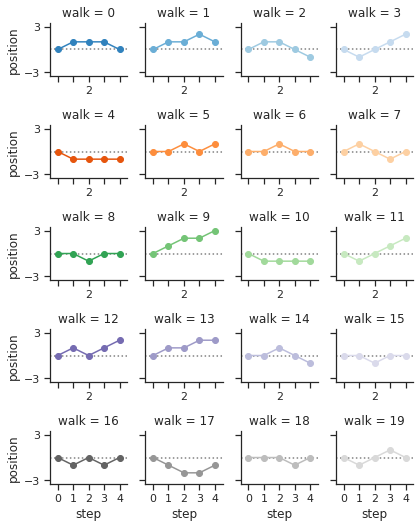

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
# 创建 [-1,2) 区间的随机整数
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

## Evaluation of 3D Localization

#### 绘制定位部分误差CDF图

In [1]:
import json
from math import sqrt
import pandas as pd
import seaborn as sns

gt_distance = []
dist_error = []
obj_mode = []
axis = []


with open('mode_and_distance.json') as fin:
    data = json.load(fin)

    for mode in data.keys():
        #print('>>>>>>>', mode)
        for interval in data[mode].keys():
            #print('>>>>>>>', interval)
            elems = data[mode][interval]

            num = len(elems)
            if num == 0:
                continue

            for elem in elems:
                gt = [float(val) for val in elem['gt']]
                computed =  [float(val) for val in elem['computed']]

                gt_distance.append(abs(gt[0]))
                dist_error_x = abs(gt[0] - computed[0])
                dist_error.append(dist_error_x)
                obj_mode.append(mode.capitalize())
                axis.append('Horizontal')

                gt_distance.append(abs(gt[1]))
                dist_error_y = abs(gt[1] - computed[1])
                dist_error.append(dist_error_y)
                obj_mode.append(mode.capitalize())
                axis.append('Vertical')

                gt_distance.append(abs(gt[2]))
                dist_error_z = abs(gt[2] - computed[2])
                dist_error.append(dist_error_z)
                obj_mode.append(mode.capitalize())
                axis.append('Depth')

                gt_distance.append(sqrt(gt[0]**2 + gt[1]**2 + gt[2]**2))
                dist_error_loc = sqrt(dist_error_x**2 + dist_error_y**2 + dist_error_z**2)
                dist_error.append(dist_error_loc)
                obj_mode.append(mode.capitalize())
                axis.append('ALL')

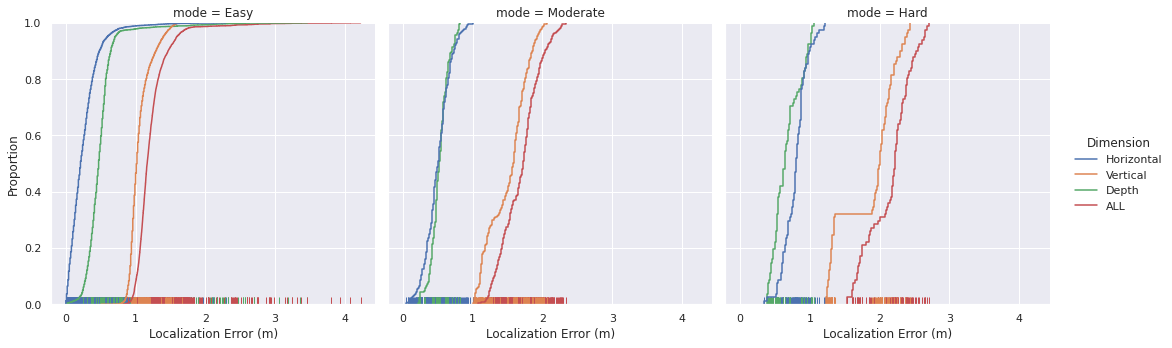

In [3]:
loc_errors = {
    'Localization Error (m)': dist_error,
    'mode': obj_mode,
    'Dimension': axis
}
                                  
columns = ['Localization Error (m)', 'mode', 'Dimension']
df = pd.DataFrame(data=loc_errors, columns=columns)

"""
为什么Vertical的误差最大，不应该是ALL吗？
    Dimension:All的误差可能是小于Dimension:Horizontal/Vertical/Depth的，尤其是当距离很远的时候
    我应该直接用标量 distance error，还是向量 distance error？
        很明显是用向量，因为标量不考虑方向，标量算出来误差为0，但实际上有可能使方向完全相反的两个位置
"""
sns.set_theme()
sns.displot(data=df, kind='ecdf', x='Localization Error (m)', col='mode', hue='Dimension', rug=True)

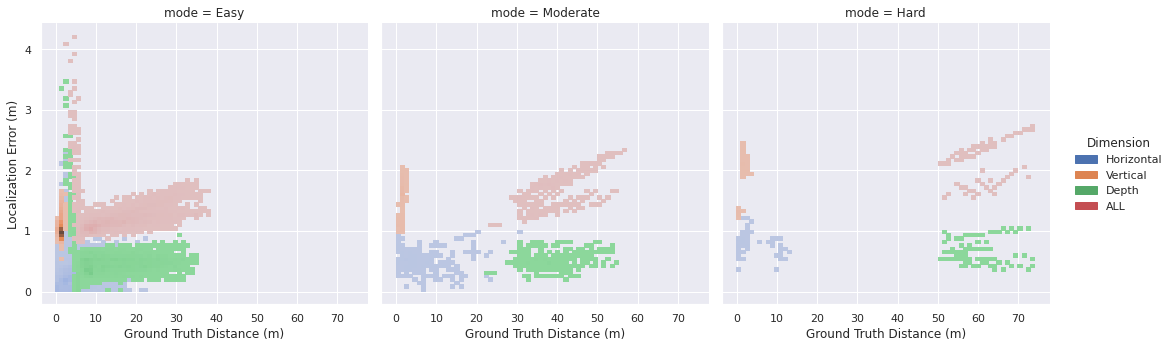

In [2]:
loc_info = {
    'Ground Truth Distance (m)': gt_distance,
    'Localization Error (m)': dist_error,
    'mode': obj_mode,
    'Dimension': axis
}

columns = ['Ground Truth Distance (m)', 'Localization Error (m)', 'mode', 'Dimension']
df = pd.DataFrame(data=loc_info, columns=columns)

sns.set_theme()
sns.displot(data=df, kind='hist', x='Ground Truth Distance (m)', y='Localization Error (m)', col='mode', hue='Dimension')

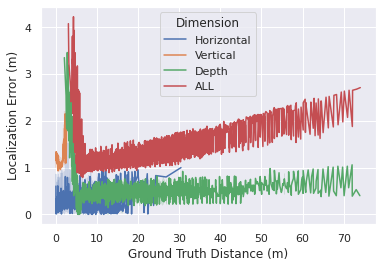

In [233]:
sns.lineplot(data=df, x='Ground Truth Distance (m)', y='Localization Error (m)', hue='Dimension')

In [213]:
df

,Distance Error (m),mode,Dimension
0,1.670000,Easy,Horizontal
1,0.860000,Easy,Vertical
2,2.240000,Easy,Depth
3,2.545167,Easy,ALL
4,0.230000,Easy,Horizontal
...,...,...,...
17935,0.535159,Hard,ALL
17936,1.100000,Hard,Horizontal
17937,2.360000,Hard,Vertical
17938,0.400000,Hard,Depth


In [194]:
from math import sqrt

In [195]:
source_x = np.zeros((3,6))
source_y = np.zeros((3,6))
source_z = np.zeros((3,6))
source_loc = np.zeros((3,6))

columns = ['d00_10', 'd10_20', 'd20_30', 'd30_40', 'd40_50', 'd_gt_50']

mode2row = {
    'easy': 0, 
    'moderate': 1,
    'hard': 2
}
interval2col = {
    'd00_10': 0,
    'd10_20': 1,
    'd20_30': 2,
    'd30_40': 3,
    'd40_50': 4,
    'd_gt_50': 5
}

In [196]:
def location_xyz():
    with open('mode_and_distance.json') as fin:
        data = json.load(fin)
        
        for mode in data.keys():
            print('>>>>>>>', mode)
            for interval in data[mode].keys():
                print('>>>>>>>', interval)
                elems = data[mode][interval]
                
                num = len(elems)
                if num == 0:
                    continue
                    
                error_x, error_y, error_z, error_loc = 0, 0, 0, 0
                for elem in elems:
                    gt = [float(val) for val in elem['gt']]
                    computed =  [float(val) for val in elem['computed']]
                    
                    error_x += abs(gt[0] - computed[0])
                    error_y += abs(gt[1] - computed[1])
                    error_z += abs(gt[2] - computed[2])
                    error_loc += abs(sqrt(gt[0]*gt[0] + gt[1]*gt[1] + gt[2]*gt[2]) - sqrt(computed[0]*computed[0] + computed[1]*computed[1] + computed[2]*computed[2]))
                                        
                error_x /= num
                error_y /= num
                error_z /= num
                error_loc /= num
#                 print('>>>>>>>>>>>>>>', error_x)
#                 print('>>>>>>>>>>>>>>', error_y)
#                 print('>>>>>>>>>>>>>>', error_z)
#                 print('>>>>>>>>>>>>>>', error_loc)
                row, col = mode2row[mode], interval2col[interval]
                source_x[row][col] = error_x
                source_y[row][col] = error_y
                source_z[row][col] = error_z
                source_loc[row][col] = error_loc

In [197]:
location_xyz()

>>>>>>> easy
>>>>>>> d00_10
>>>>>>> d10_20
>>>>>>> d20_30
>>>>>>> d30_40
>>>>>>> d40_50
>>>>>>> d_gt_50
>>>>>>> moderate
>>>>>>> d00_10
>>>>>>> d10_20
>>>>>>> d20_30
>>>>>>> d30_40
>>>>>>> d40_50
>>>>>>> d_gt_50
>>>>>>> hard
>>>>>>> d00_10
>>>>>>> d10_20
>>>>>>> d20_30
>>>>>>> d30_40
>>>>>>> d40_50
>>>>>>> d_gt_50


In [198]:
import pandas as pd

pd_x = pd.DataFrame(data=source_x, columns=columns)
pd_y = pd.DataFrame(data=source_y, columns=columns)
pd_z = pd.DataFrame(data=source_z, columns=columns)
pd_loc = pd.DataFrame(data=source_loc, columns=columns)

**放弃用这种方式可视化了，看下面的 dataframe，缺的值很多，画出来图不协调**

In [199]:
pd_x

,d00_10,d10_20,d20_30,d30_40,d40_50,d_gt_50
0,0.25988,0.206241,0.305739,0.353775,0.000000,0.000000
1,0.00000,0.000000,0.232857,0.437927,0.566348,0.744167
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.792346


In [200]:
pd_y

,d00_10,d10_20,d20_30,d30_40,d40_50,d_gt_50
0,0.952468,1.031531,1.177024,1.303382,0.000000,0.000000
1,0.000000,0.000000,1.230000,1.416218,1.616957,1.796667
2,0.000000,0.000000,0.000000,0.000000,0.000000,1.848395


In [201]:
pd_z

,d00_10,d10_20,d20_30,d30_40,d40_50,d_gt_50
0,0.527876,0.464558,0.492741,0.474069,0.000000,0.000000
1,0.000000,0.000000,0.467143,0.513731,0.524522,0.619167
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.667407


In [202]:
pd_loc

,d00_10,d10_20,d20_30,d30_40,d40_50,d_gt_50
0,0.65151,0.561662,0.547252,0.510637,0.000000,0.000000
1,0.00000,0.000000,0.486515,0.553457,0.558546,0.674609
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.636231


#### 误差分析

1. 这些个误差很有特点，d10_20比较明显，远远超过其他情况的误差，到底是为什么呢？
    - 相比于 pd_x/pd_z/pd_loc，pd_y 又小了一个数量级，这是为什么？
2. 其他情况的误差都在可接受的范围
3. 解决这个问题，首先要分析代码写的有没有问题
    - 设计可验证的代码
    - 特殊情况举例
4. 现在有了进展，确定了是由于这个位置的计算导致了整体很大的误差
    - 找到这个位置对应的json文件

In [188]:
# 下面的代码就要找出这个文件，看看到底是怎么回事
import os, json

flag = False
location_dir = '/mnt/sdb/public/data/kitti/object/training/localization/'

for f_loc in os.listdir(location_dir):
    if f_loc != 'error_rate.json' and f_loc.endswith('.json'):
        with open(os.path.join(location_dir, f_loc)) as fin:
            data = json.load(fin)
            for idx in data.keys():
                gt = data[idx]['gt']
                x,y,z = gt[0], gt[1], gt[2]
                if x=="10.96" and y=="0.94" and z=="11.81":
                    flag = True
                    break
        if flag:
            print('target JSON file:', f_loc)
            break

target JSON file: 004569.json


In [193]:
# 对于004569.json文件中的pedestrian，用我们的方法计算其相机坐标下3D位置

fy = 7.070493000000e+02
fx = 7.070493000000e+02
H = 1.62 # 行人身高，来自数据集标签
xj = (1222.89 + 1223.00) / 2 # ******* 这里左边界和有边界太靠近了，我觉得是这个引起了大的误差，图片宽度总共才 1224 px*******
yj = (153.94 + 140.42) / 2
xi = 1224 / 2
yi = 370 / 2
h = 153.94 - 140.42

print('computed_x = ', fy / fx * H * (xj - xi) / h)
print('computed_y = ', H * (yj - yi) / h)
print('computed_z = ', H * fy / h)

# ****** 这样算出来误差确实很大：解决办法是评估定位结果是时不考虑它，太特殊干扰全局，从localization目录移除 ******

computed_x =  73.20494822485205
computed_y =  -4.53168639053254
computed_z =  84.72040428994077


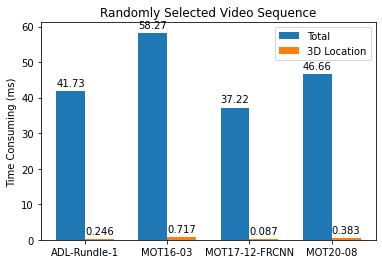

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['ADL-Rundle-1', 'MOT16-03', 'MOT17-12-FRCNN', 'MOT20-08']
men_means = [41.73, 58.27, 37.22, 46.66]
women_means = [0.246, 0.717, 0.087, 0.383]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Total')
rects2 = ax.bar(x + width/2, women_means, width, label='3D Location')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time Consuming (ms)')
ax.set_title('Randomly Selected Video Sequence')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()